In [1]:
%load_ext autoreload
%autoreload 2

import os

os.chdir("..")

import torch
import wandb
import torchvision
import torchmetrics
from tqdm.notebook import tqdm
from src.utils.metrics import metrics, Metrics
from src.data.mri import MRIDataModule
from src.data.covidx import COVIDXDataModule
from src.utils.evaluation import WeightsandBiasEval
from src.models.imageclassifier import ImageClassifier

In [2]:
ENTITY = "24FS_I4DS27"
PROJECT = "baselines"
NUM_WORKERS = 1

transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize((224, 224), antialias=True),
    ]
)
device = "cuda" if torch.cuda.is_available() else "mps" if torch.mps.is_available() else "cpu"

evaluator = WeightsandBiasEval(entity_project_name=f"{ENTITY}/{PROJECT}")

In [3]:
best_models = evaluator.get_best_models()
best_models

,id,model,dataset,epoch,lr,epochs,batch_size,weight_decay,p_dropout_classifier,first_unfreeze_epoch,...,train_BinaryRecall,train_BinarySpecificity,train_loss,val_BinaryAUROC,val_BinaryAccuracy,val_BinaryF1Score,val_BinaryPrecision,val_BinaryRecall,val_BinarySpecificity,val_loss
0,3ibcnbp1,alexnet,covidx_data,0,0.00001,50,32,0,0,5.0,...,0.990596,0.007663,1.435608,0.500000,0.500531,0.667139,0.500531,1.000000,0.000000,4.495397
1,x48n43n1,densenet121,covidx_data,47,0.00100,50,32,0,0,NaN,...,0.986297,0.859232,0.095050,0.933604,0.858964,0.862121,0.844103,0.880924,0.836957,0.366717
2,69kep6pr,densenet169,covidx_data,30,0.00100,50,32,0,0,NaN,...,0.980675,0.683729,0.198558,0.925435,0.835005,0.843484,0.803027,0.888234,0.781664,0.368208
3,fghvm9cs,densenet201,covidx_data,26,0.00100,50,32,0,0,NaN,...,0.977864,0.756856,0.162382,0.931639,0.857193,0.861967,0.834917,0.890828,0.823488,0.340752
4,9i2glr7w,efficientnet_v2_l,covidx_data,41,0.00010,50,32,0,0,NaN,...,0.960647,0.614260,0.256415,0.908821,0.793816,0.820471,0.727140,0.941287,0.646030,0.504318
5,mym2lvia,efficientnet_v2_m,covidx_data,44,0.00001,50,32,0,0,NaN,...,0.977161,0.270567,0.343028,0.876601,0.735159,0.779914,0.667674,0.937515,0.532372,0.534945
6,cnovpv82,efficientnet_v2_s,covidx_data,28,0.00001,50,32,0,0,NaN,...,0.971188,0.663620,0.198885,0.898201,0.805618,0.827449,0.744532,0.931148,0.679820,0.498222
7,qudwyxgn,resnet152,covidx_data,38,0.00010,50,32,0,0,NaN,...,0.984891,0.833638,0.111774,0.929274,0.857311,0.866953,0.812835,0.928790,0.785681,0.405701
8,qa9563x2,resnet18,covidx_data,21,0.00001,50,32,0,0,5.0,...,0.981514,0.648289,0.207511,0.937457,0.863567,0.864795,0.857972,0.871728,0.855388,0.316192
9,h9zdsniz,resnet50,covidx_data,36,0.00001,50,32,0,0,NaN,...,0.981026,0.736746,0.168403,0.933595,0.872536,0.882096,0.821305,0.952606,0.792297,0.382026


Model - Dataset Pair:   0%|          | 0/22 [00:00<?, ?it/s]


Model: alexnet - Dataset: covidx_data


Batch:   0%|          | 0/266 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.5000, device='cuda:0'), 'BinaryPrecision': tensor(0.5000, device='cuda:0'), 'BinaryRecall': tensor(1., device='cuda:0'), 'BinaryF1Score': tensor(0.6667, device='cuda:0'), 'BinarySpecificity': tensor(0., device='cuda:0'), 'BinaryAUROC': tensor(0.5000, device='cuda:0')}
tensor([[   0, 4241],
        [   0, 4241]], device='cuda:0')


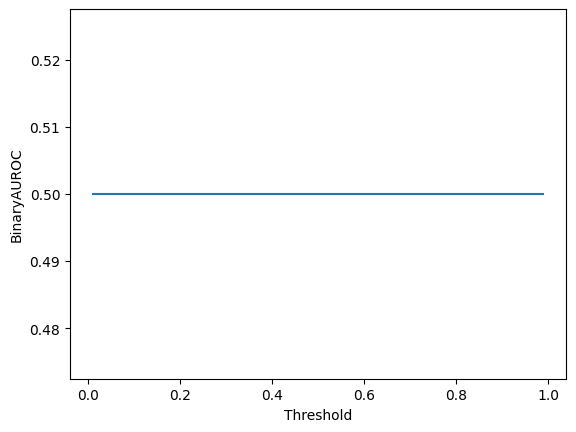

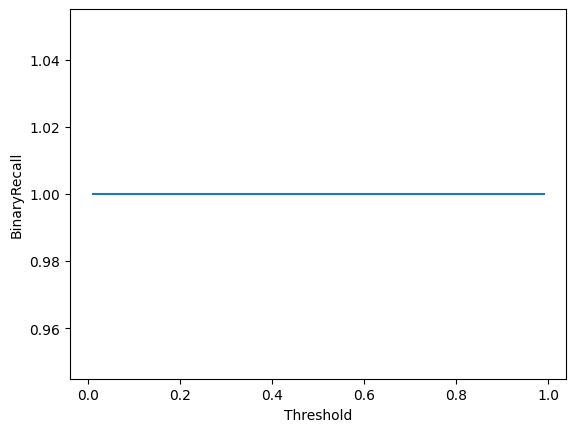

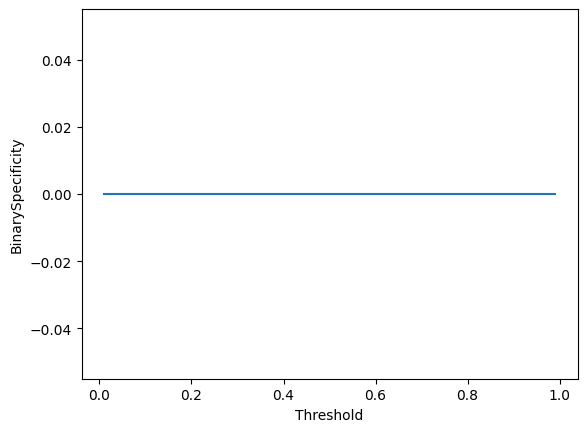


Model: densenet121 - Dataset: covidx_data


Batch:   0%|          | 0/266 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.5683, device='cuda:0'), 'BinaryPrecision': tensor(0.5415, device='cuda:0'), 'BinaryRecall': tensor(0.8911, device='cuda:0'), 'BinaryF1Score': tensor(0.6736, device='cuda:0'), 'BinarySpecificity': tensor(0.2455, device='cuda:0'), 'BinaryAUROC': tensor(0.6721, device='cuda:0')}
tensor([[1041, 3200],
        [ 462, 3779]], device='cuda:0')


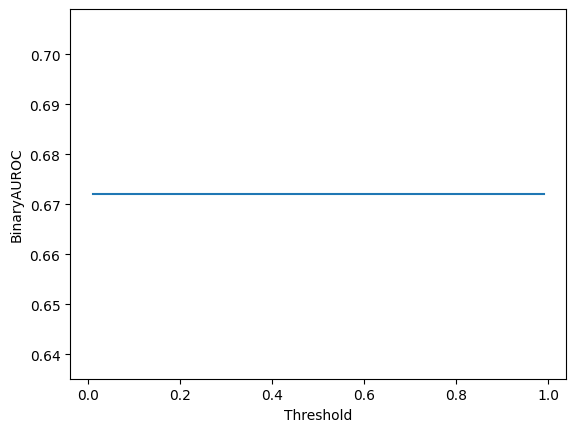

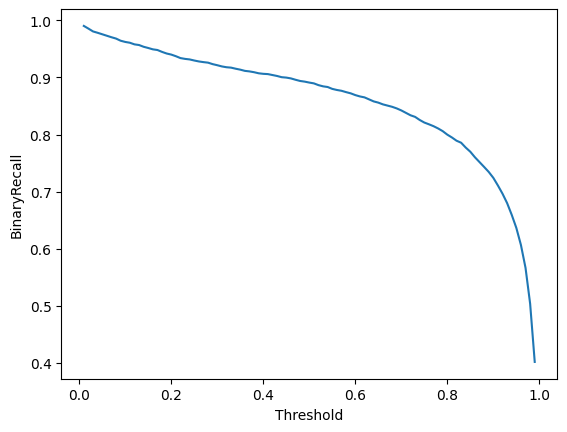

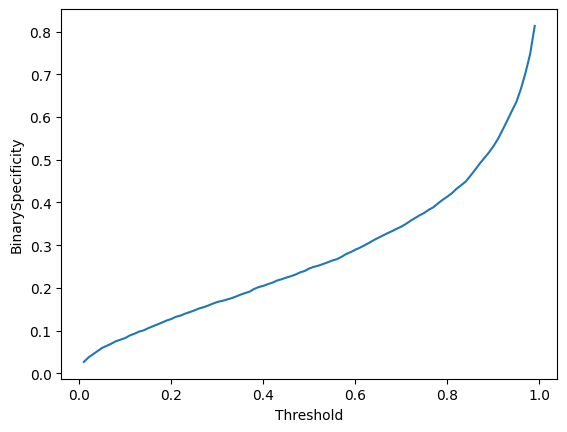


Model: densenet169 - Dataset: covidx_data


Batch:   0%|          | 0/266 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.6080, device='cuda:0'), 'BinaryPrecision': tensor(0.5656, device='cuda:0'), 'BinaryRecall': tensor(0.9307, device='cuda:0'), 'BinaryF1Score': tensor(0.7036, device='cuda:0'), 'BinarySpecificity': tensor(0.2853, device='cuda:0'), 'BinaryAUROC': tensor(0.7570, device='cuda:0')}
tensor([[1210, 3031],
        [ 294, 3947]], device='cuda:0')


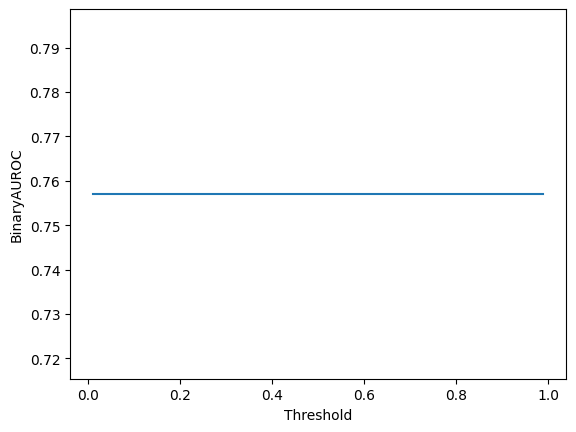

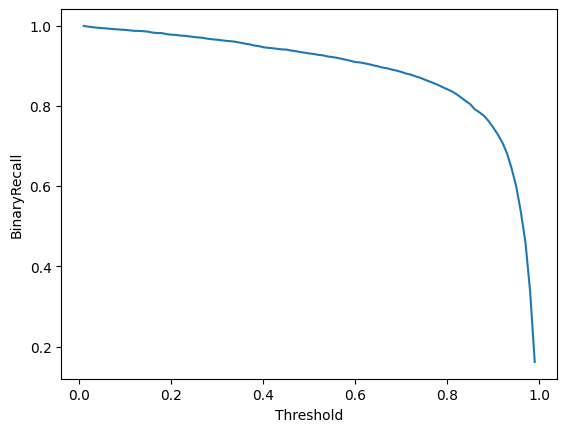

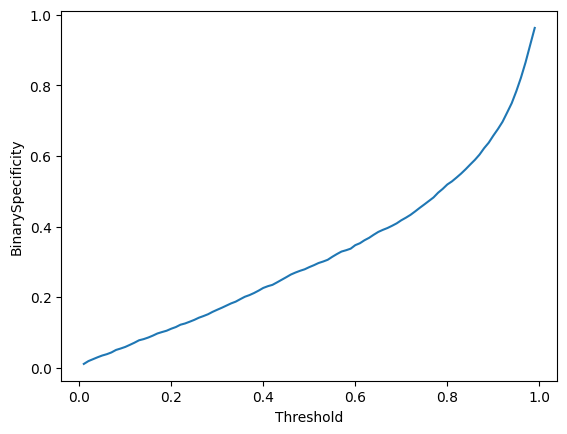


Model: densenet201 - Dataset: covidx_data


Batch:   0%|          | 0/266 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.5697, device='cuda:0'), 'BinaryPrecision': tensor(0.5403, device='cuda:0'), 'BinaryRecall': tensor(0.9347, device='cuda:0'), 'BinaryF1Score': tensor(0.6847, device='cuda:0'), 'BinarySpecificity': tensor(0.2047, device='cuda:0'), 'BinaryAUROC': tensor(0.7070, device='cuda:0')}
tensor([[ 868, 3373],
        [ 277, 3964]], device='cuda:0')


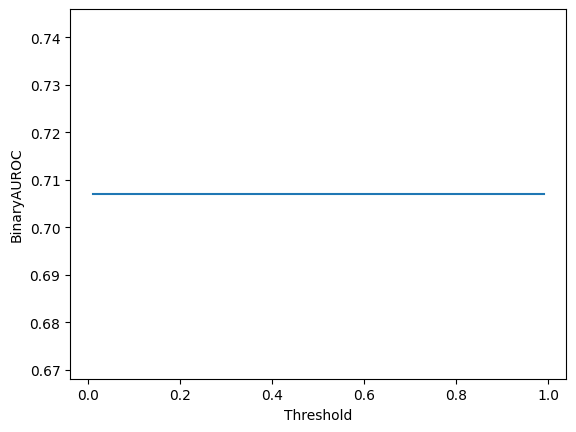

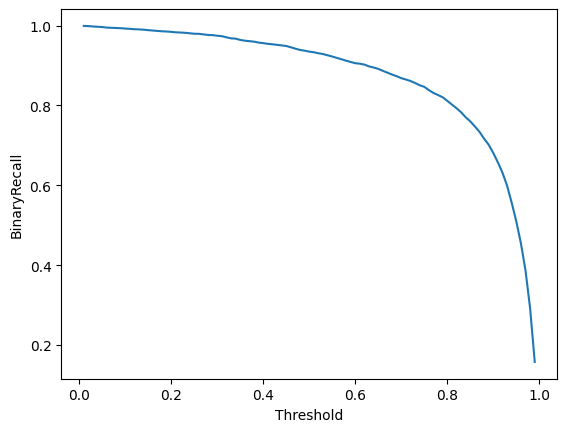

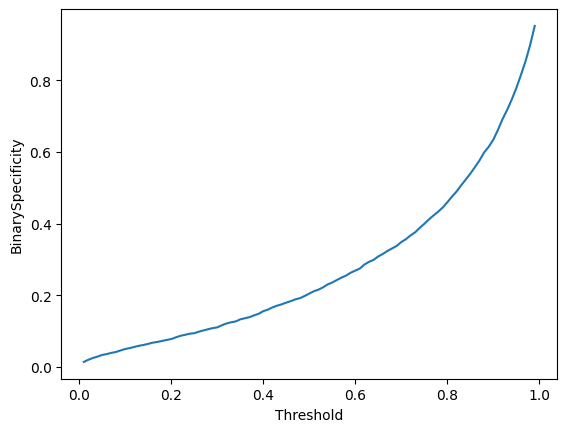


Model: efficientnet_v2_l - Dataset: covidx_data


Batch:   0%|          | 0/266 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.5263, device='cuda:0'), 'BinaryPrecision': tensor(0.5144, device='cuda:0'), 'BinaryRecall': tensor(0.9363, device='cuda:0'), 'BinaryF1Score': tensor(0.6640, device='cuda:0'), 'BinarySpecificity': tensor(0.1162, device='cuda:0'), 'BinaryAUROC': tensor(0.6651, device='cuda:0')}
tensor([[ 493, 3748],
        [ 270, 3971]], device='cuda:0')


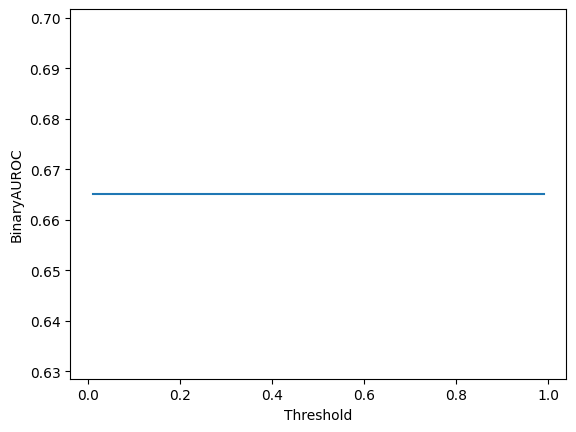

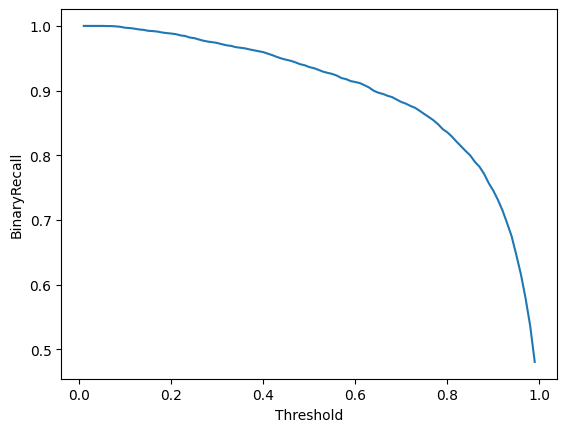

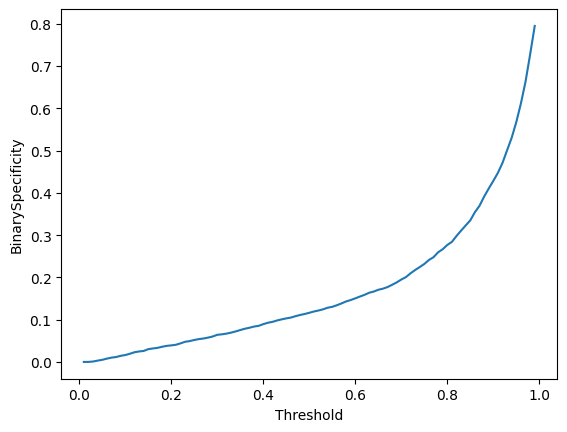


Model: efficientnet_v2_m - Dataset: covidx_data


Batch:   0%|          | 0/266 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.5502, device='cuda:0'), 'BinaryPrecision': tensor(0.5283, device='cuda:0'), 'BinaryRecall': tensor(0.9387, device='cuda:0'), 'BinaryF1Score': tensor(0.6761, device='cuda:0'), 'BinarySpecificity': tensor(0.1618, device='cuda:0'), 'BinaryAUROC': tensor(0.7211, device='cuda:0')}
tensor([[ 686, 3555],
        [ 260, 3981]], device='cuda:0')


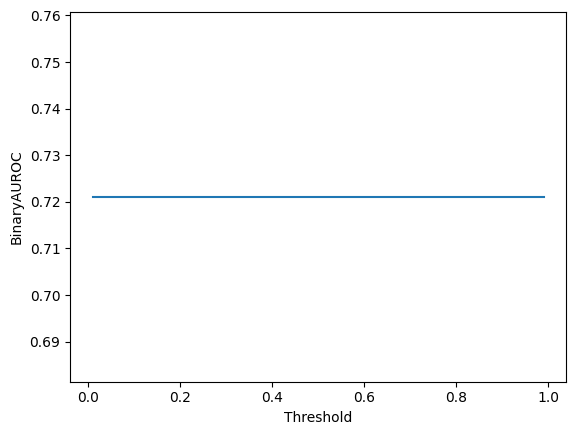

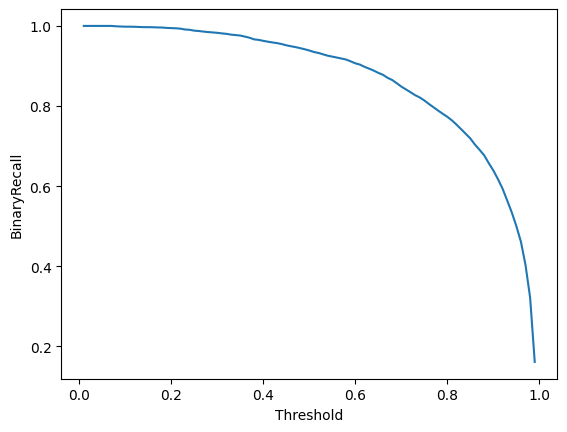

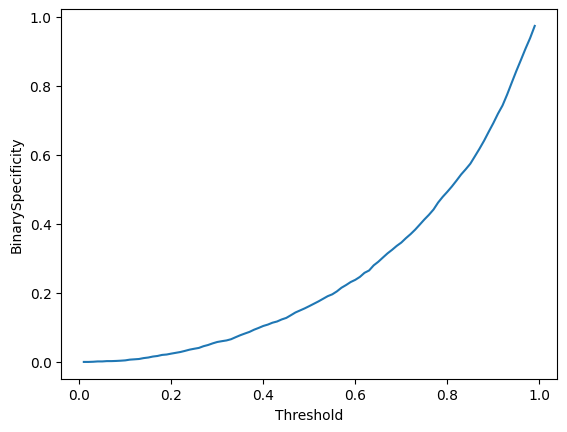


Model: efficientnet_v2_s - Dataset: covidx_data


Batch:   0%|          | 0/266 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.5329, device='cuda:0'), 'BinaryPrecision': tensor(0.5179, device='cuda:0'), 'BinaryRecall': tensor(0.9538, device='cuda:0'), 'BinaryF1Score': tensor(0.6713, device='cuda:0'), 'BinarySpecificity': tensor(0.1120, device='cuda:0'), 'BinaryAUROC': tensor(0.5787, device='cuda:0')}
tensor([[ 475, 3766],
        [ 196, 4045]], device='cuda:0')


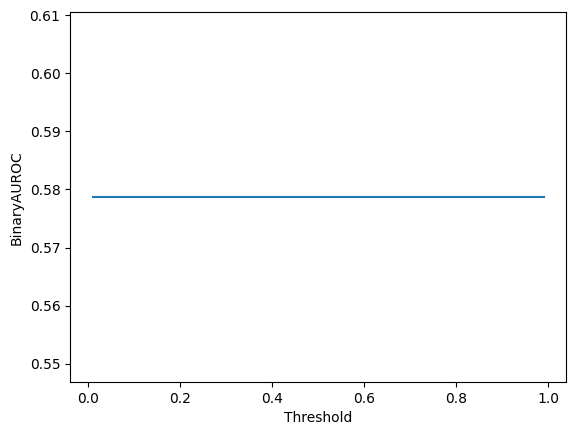

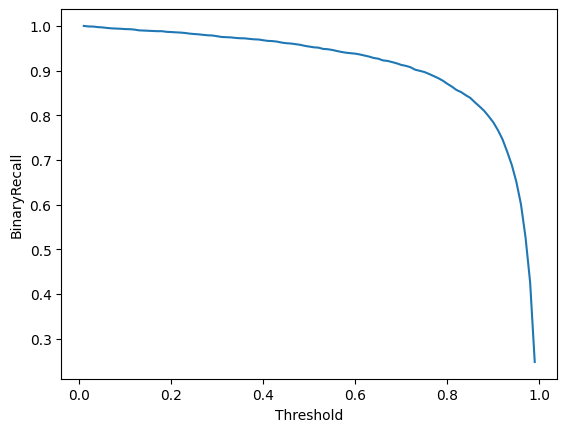

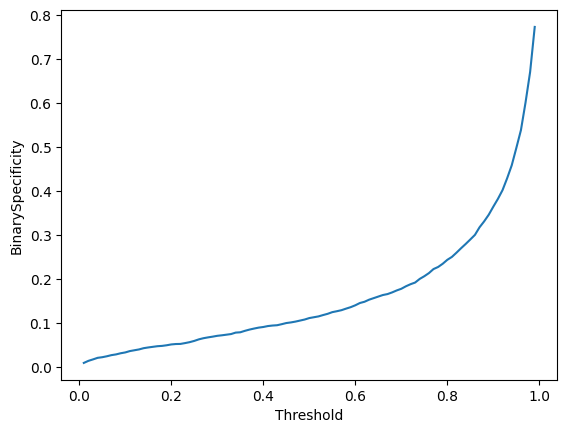


Model: resnet152 - Dataset: covidx_data


Downloading: "https://download.pytorch.org/models/resnet152-f82ba261.pth" to /home/jovyan/.cache/torch/hub/checkpoints/resnet152-f82ba261.pth


  0%|                                                                  | 0.00/230M [00:00<?, ?B/s]

  2%|█▎                                                       | 5.39M/230M [00:00<00:04, 56.3MB/s]

  7%|███▉                                                     | 16.1M/230M [00:00<00:02, 88.7MB/s]

 13%|███████▍                                                  | 29.4M/230M [00:00<00:01, 112MB/s]

 19%|██████████▉                                               | 43.2M/230M [00:00<00:01, 122MB/s]

 24%|█████████████▊                                            | 54.8M/230M [00:00<00:01, 120MB/s]

 29%|████████████████▋                                         | 66.3M/230M [00:00<00:01, 109MB/s]

 34%|███████████████████▋                                      | 78.2M/230M [00:00<00:01, 113MB/s]

 39%|██████████████████████▊                                   | 90.6M/230M [00:00<00:01, 118MB/s]

 45%|██████████████████████████▍                                | 103M/230M [00:00<00:01, 122MB/s]

 50%|█████████████████████████████▌                             | 116M/230M [00:01<00:00, 125MB/s]

 55%|████████████████████████████████▋                          | 128M/230M [00:01<00:00, 125MB/s]

 61%|███████████████████████████████████▊                       | 140M/230M [00:01<00:00, 126MB/s]

 66%|██████████████████████████████████████▉                    | 152M/230M [00:01<00:00, 125MB/s]

 71%|█████████████████████████████████████████▉                 | 164M/230M [00:01<00:00, 122MB/s]

 76%|████████████████████████████████████████████▉              | 176M/230M [00:01<00:00, 122MB/s]

 82%|████████████████████████████████████████████████▏          | 188M/230M [00:01<00:00, 124MB/s]

 87%|███████████████████████████████████████████████████▎       | 201M/230M [00:01<00:00, 125MB/s]

 92%|██████████████████████████████████████████████████████▍    | 213M/230M [00:01<00:00, 126MB/s]

 98%|█████████████████████████████████████████████████████████▋ | 225M/230M [00:01<00:00, 126MB/s]

100%|███████████████████████████████████████████████████████████| 230M/230M [00:02<00:00, 121MB/s]

Batch:   0%|          | 0/266 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.5344, device='cuda:0'), 'BinaryPrecision': tensor(0.5191, device='cuda:0'), 'BinaryRecall': tensor(0.9359, device='cuda:0'), 'BinaryF1Score': tensor(0.6678, device='cuda:0'), 'BinarySpecificity': tensor(0.1330, device='cuda:0'), 'BinaryAUROC': tensor(0.6152, device='cuda:0')}
tensor([[ 564, 3677],
        [ 272, 3969]], device='cuda:0')


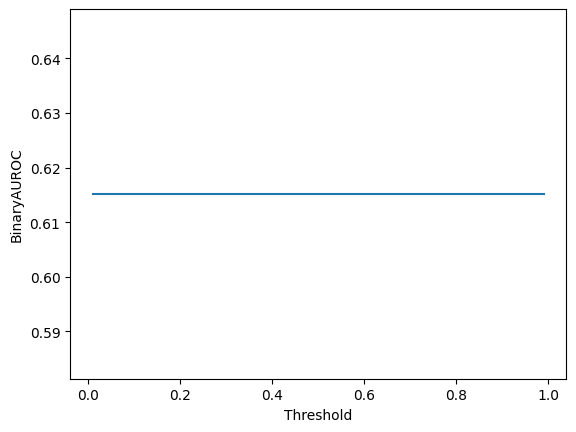

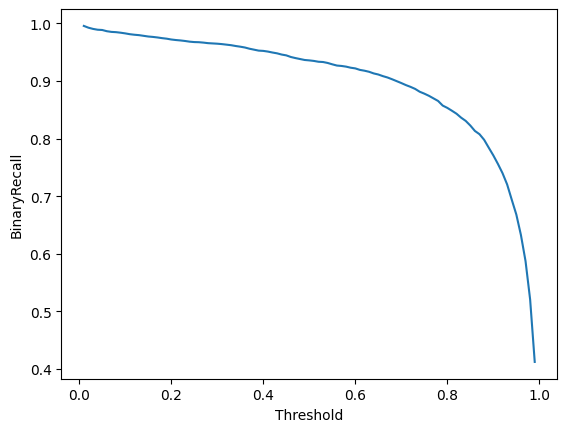

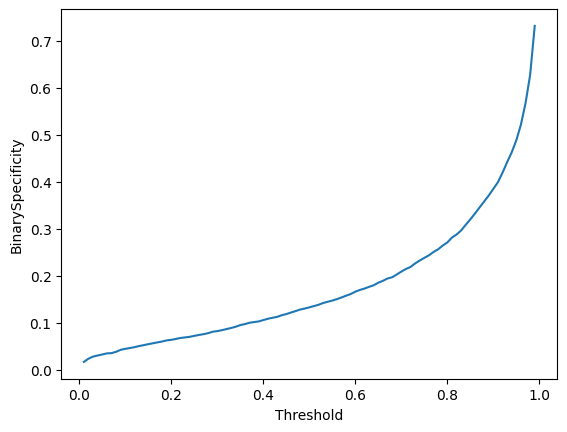


Model: resnet18 - Dataset: covidx_data


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/jovyan/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|                                                                 | 0.00/44.7M [00:00<?, ?B/s]

 24%|█████████████▊                                           | 10.8M/44.7M [00:00<00:00, 112MB/s]

 57%|████████████████████████████████▎                        | 25.3M/44.7M [00:00<00:00, 134MB/s]

 88%|██████████████████████████████████████████████████▏      | 39.3M/44.7M [00:00<00:00, 138MB/s]

100%|█████████████████████████████████████████████████████████| 44.7M/44.7M [00:00<00:00, 138MB/s]

Batch:   0%|          | 0/266 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.5646, device='cuda:0'), 'BinaryPrecision': tensor(0.5401, device='cuda:0'), 'BinaryRecall': tensor(0.8696, device='cuda:0'), 'BinaryF1Score': tensor(0.6664, device='cuda:0'), 'BinarySpecificity': tensor(0.2596, device='cuda:0'), 'BinaryAUROC': tensor(0.6400, device='cuda:0')}
tensor([[1101, 3140],
        [ 553, 3688]], device='cuda:0')


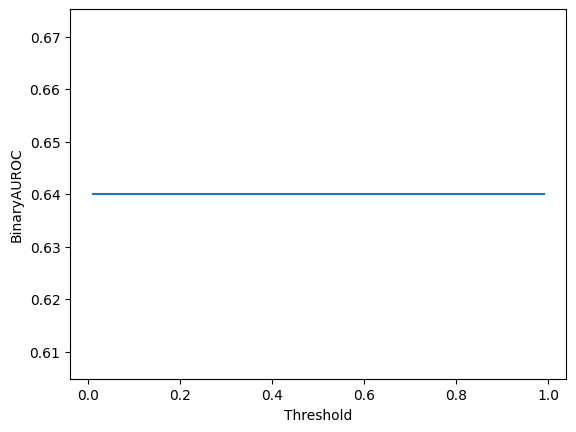

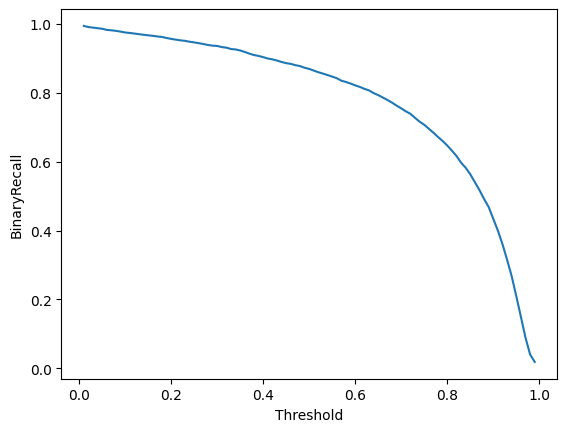

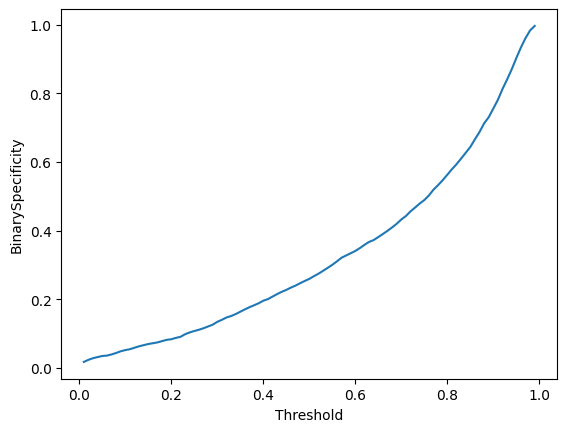


Model: resnet50 - Dataset: covidx_data


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /home/jovyan/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


  0%|                                                                 | 0.00/97.8M [00:00<?, ?B/s]

  7%|████                                                    | 7.18M/97.8M [00:00<00:01, 75.0MB/s]

 18%|██████████▏                                             | 17.8M/97.8M [00:00<00:00, 95.5MB/s]

 33%|██████████████████▌                                      | 31.9M/97.8M [00:00<00:00, 119MB/s]

 48%|███████████████████████████▎                             | 47.0M/97.8M [00:00<00:00, 134MB/s]

 63%|███████████████████████████████████▊                     | 61.4M/97.8M [00:00<00:00, 140MB/s]

 76%|███████████████████████████████████████████▌             | 74.8M/97.8M [00:00<00:00, 135MB/s]

 92%|████████████████████████████████████████████████████▋    | 90.4M/97.8M [00:00<00:00, 144MB/s]

100%|█████████████████████████████████████████████████████████| 97.8M/97.8M [00:00<00:00, 134MB/s]

Batch:   0%|          | 0/266 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.5139, device='cuda:0'), 'BinaryPrecision': tensor(0.5075, device='cuda:0'), 'BinaryRecall': tensor(0.9436, device='cuda:0'), 'BinaryF1Score': tensor(0.6600, device='cuda:0'), 'BinarySpecificity': tensor(0.0842, device='cuda:0'), 'BinaryAUROC': tensor(0.5728, device='cuda:0')}
tensor([[ 357, 3884],
        [ 239, 4002]], device='cuda:0')


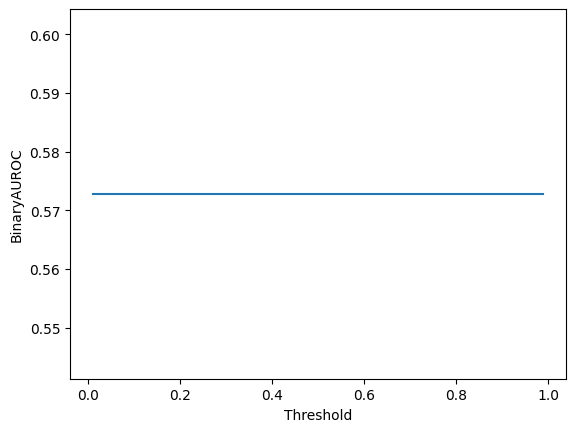

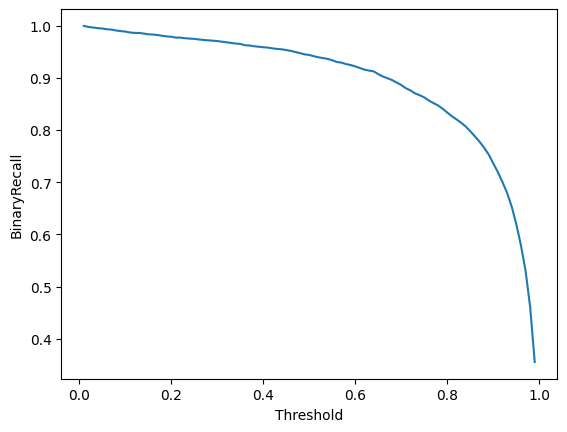

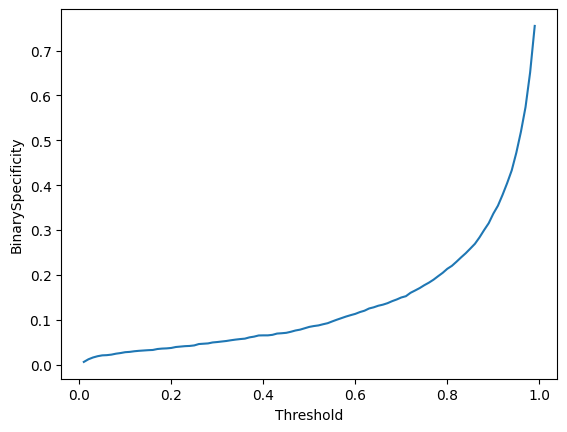


Model: vgg11 - Dataset: covidx_data


Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /home/jovyan/.cache/torch/hub/checkpoints/vgg11-8a719046.pth


  0%|                                                                  | 0.00/507M [00:00<?, ?B/s]

  1%|▌                                                        | 5.12M/507M [00:00<00:09, 53.7MB/s]

  2%|█▏                                                       | 10.2M/507M [00:00<00:09, 52.3MB/s]

  4%|██                                                       | 18.3M/507M [00:00<00:07, 66.6MB/s]

  6%|███▎                                                     | 29.7M/507M [00:00<00:05, 86.9MB/s]

  8%|████▌                                                    | 40.6M/507M [00:00<00:05, 96.0MB/s]

 10%|██████                                                    | 52.8M/507M [00:00<00:04, 107MB/s]

 13%|███████▍                                                  | 65.1M/507M [00:00<00:04, 114MB/s]

 15%|████████▊                                                 | 76.8M/507M [00:00<00:03, 116MB/s]

 18%|██████████▏                                               | 89.6M/507M [00:00<00:03, 121MB/s]

 20%|███████████▊                                               | 101M/507M [00:01<00:03, 122MB/s]

 22%|█████████████▏                                             | 114M/507M [00:01<00:03, 123MB/s]

 25%|██████████████▋                                            | 126M/507M [00:01<00:03, 124MB/s]

 27%|████████████████                                           | 138M/507M [00:01<00:03, 125MB/s]

 30%|█████████████████▍                                         | 150M/507M [00:01<00:02, 125MB/s]

 32%|██████████████████▊                                        | 162M/507M [00:01<00:02, 122MB/s]

 34%|████████████████████▏                                      | 174M/507M [00:01<00:02, 121MB/s]

 37%|█████████████████████▋                                     | 186M/507M [00:01<00:02, 123MB/s]

 39%|███████████████████████▎                                   | 200M/507M [00:01<00:02, 129MB/s]

 42%|████████████████████████▋                                  | 212M/507M [00:01<00:02, 124MB/s]

 44%|██████████████████████████                                 | 224M/507M [00:02<00:02, 125MB/s]

 47%|███████████████████████████▌                               | 237M/507M [00:02<00:02, 126MB/s]

 49%|█████████████████████████████                              | 249M/507M [00:02<00:02, 127MB/s]

 52%|██████████████████████████████▍                            | 261M/507M [00:02<00:02, 126MB/s]

 54%|███████████████████████████████▉                           | 274M/507M [00:02<00:01, 127MB/s]

 57%|█████████████████████████████████▎                         | 286M/507M [00:02<00:01, 127MB/s]

 59%|██████████████████████████████████▊                        | 299M/507M [00:02<00:01, 126MB/s]

 61%|████████████████████████████████████▏                      | 311M/507M [00:02<00:01, 128MB/s]

 64%|█████████████████████████████████████▋                     | 324M/507M [00:02<00:01, 128MB/s]

 66%|███████████████████████████████████████                    | 336M/507M [00:02<00:01, 128MB/s]

 69%|████████████████████████████████████████▌                  | 348M/507M [00:03<00:01, 126MB/s]

 71%|█████████████████████████████████████████▉                 | 361M/507M [00:03<00:01, 127MB/s]

 74%|███████████████████████████████████████████▍               | 373M/507M [00:03<00:01, 127MB/s]

 76%|████████████████████████████████████████████▊              | 385M/507M [00:03<00:01, 123MB/s]

 78%|██████████████████████████████████████████████▏            | 397M/507M [00:03<00:00, 124MB/s]

 81%|███████████████████████████████████████████████▊           | 411M/507M [00:03<00:00, 129MB/s]

 84%|█████████████████████████████████████████████████▌         | 426M/507M [00:03<00:00, 138MB/s]

 87%|███████████████████████████████████████████████████▎       | 441M/507M [00:03<00:00, 143MB/s]

 90%|█████████████████████████████████████████████████████      | 456M/507M [00:03<00:00, 149MB/s]

 93%|██████████████████████████████████████████████████████▊    | 471M/507M [00:03<00:00, 152MB/s]

 96%|████████████████████████████████████████████████████████▌  | 486M/507M [00:04<00:00, 153MB/s]

 99%|██████████████████████████████████████████████████████████▎| 501M/507M [00:04<00:00, 154MB/s]

100%|███████████████████████████████████████████████████████████| 507M/507M [00:04<00:00, 126MB/s]

Batch:   0%|          | 0/266 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.5000, device='cuda:0'), 'BinaryPrecision': tensor(0.5000, device='cuda:0'), 'BinaryRecall': tensor(1., device='cuda:0'), 'BinaryF1Score': tensor(0.6667, device='cuda:0'), 'BinarySpecificity': tensor(0., device='cuda:0'), 'BinaryAUROC': tensor(0.5000, device='cuda:0')}
tensor([[   0, 4241],
        [   0, 4241]], device='cuda:0')


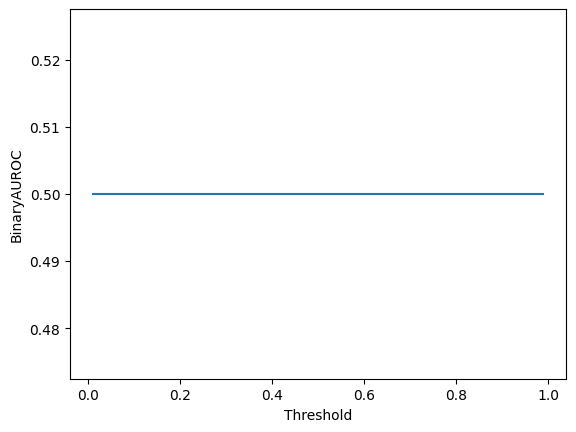

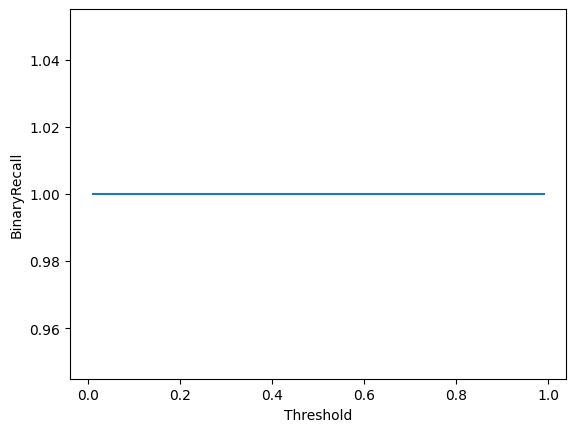

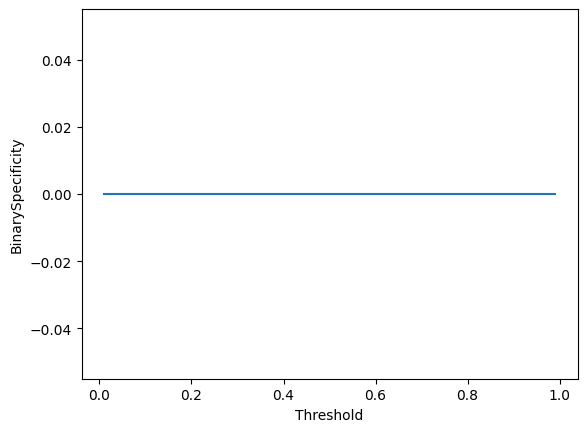


Model: vit_b_16 - Dataset: covidx_data


Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /home/jovyan/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth


  0%|                                                                  | 0.00/330M [00:00<?, ?B/s]

  2%|█                                                        | 6.30M/330M [00:00<00:05, 65.9MB/s]

  5%|██▉                                                      | 16.7M/330M [00:00<00:03, 91.1MB/s]

  9%|█████                                                     | 29.1M/330M [00:00<00:02, 108MB/s]

 12%|██████▉                                                   | 39.8M/330M [00:00<00:02, 110MB/s]

 16%|█████████▍                                                | 53.7M/330M [00:00<00:02, 123MB/s]

 21%|███████████▉                                              | 67.9M/330M [00:00<00:02, 131MB/s]

 25%|██████████████▋                                           | 83.6M/330M [00:00<00:01, 141MB/s]

 30%|█████████████████▏                                        | 97.9M/330M [00:00<00:01, 144MB/s]

 34%|████████████████████▎                                      | 114M/330M [00:00<00:01, 151MB/s]

 39%|███████████████████████                                    | 129M/330M [00:01<00:01, 153MB/s]

 44%|█████████████████████████▊                                 | 144M/330M [00:01<00:01, 156MB/s]

 49%|████████████████████████████▌                              | 160M/330M [00:01<00:01, 159MB/s]

 53%|███████████████████████████████▍                           | 176M/330M [00:01<00:01, 161MB/s]

 58%|██████████████████████████████████▏                        | 192M/330M [00:01<00:00, 162MB/s]

 63%|████████████████████████████████████▉                      | 207M/330M [00:01<00:00, 161MB/s]

 67%|███████████████████████████████████████▋                   | 222M/330M [00:01<00:00, 159MB/s]

 72%|██████████████████████████████████████████▍                | 238M/330M [00:01<00:00, 151MB/s]

 77%|█████████████████████████████████████████████▎             | 253M/330M [00:01<00:00, 155MB/s]

 81%|███████████████████████████████████████████████▉           | 269M/330M [00:01<00:00, 156MB/s]

 86%|██████████████████████████████████████████████████▋        | 284M/330M [00:02<00:00, 153MB/s]

 91%|█████████████████████████████████████████████████████▍     | 299M/330M [00:02<00:00, 156MB/s]

 95%|████████████████████████████████████████████████████████▏  | 315M/330M [00:02<00:00, 158MB/s]

100%|██████████████████████████████████████████████████████████▉| 330M/330M [00:02<00:00, 148MB/s]

100%|███████████████████████████████████████████████████████████| 330M/330M [00:02<00:00, 146MB/s]

Batch:   0%|          | 0/266 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.5000, device='cuda:0'), 'BinaryPrecision': tensor(0.5000, device='cuda:0'), 'BinaryRecall': tensor(1., device='cuda:0'), 'BinaryF1Score': tensor(0.6667, device='cuda:0'), 'BinarySpecificity': tensor(0., device='cuda:0'), 'BinaryAUROC': tensor(0.5087, device='cuda:0')}
tensor([[   0, 4241],
        [   0, 4241]], device='cuda:0')


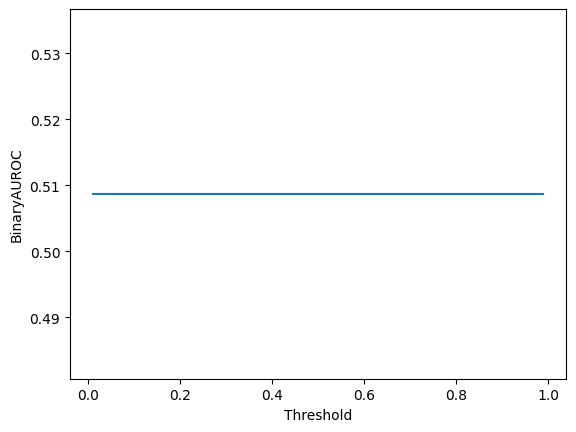

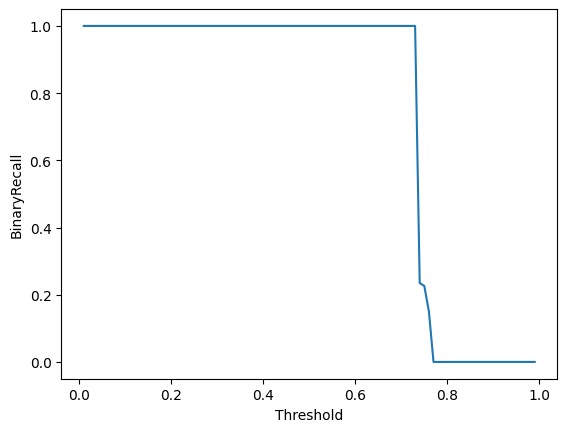

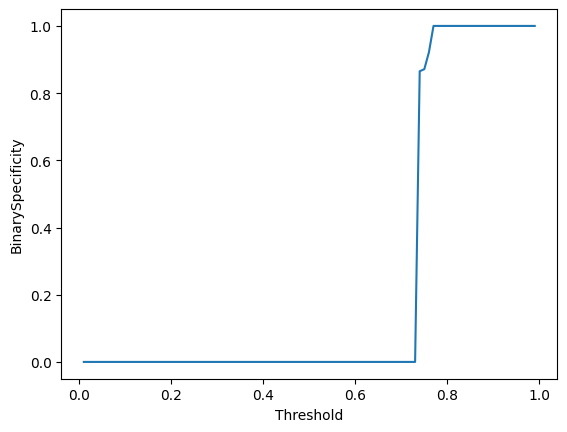


Model: alexnet - Dataset: mri_data


Batch:   0%|          | 0/13 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.7335, device='cuda:0'), 'BinaryPrecision': tensor(0.7335, device='cuda:0'), 'BinaryRecall': tensor(1., device='cuda:0'), 'BinaryF1Score': tensor(0.8463, device='cuda:0'), 'BinarySpecificity': tensor(0., device='cuda:0'), 'BinaryAUROC': tensor(0.5000, device='cuda:0')}
tensor([[  0, 105],
        [  0, 289]], device='cuda:0')


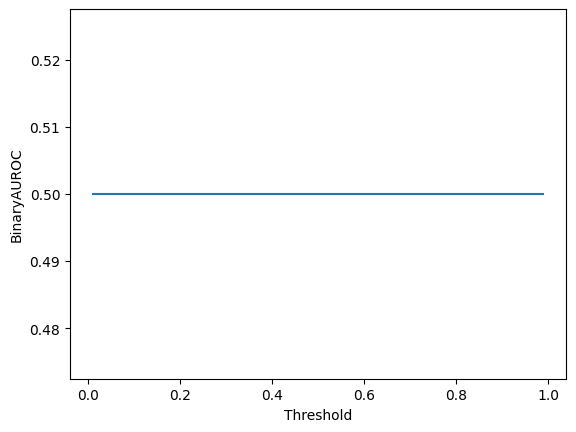

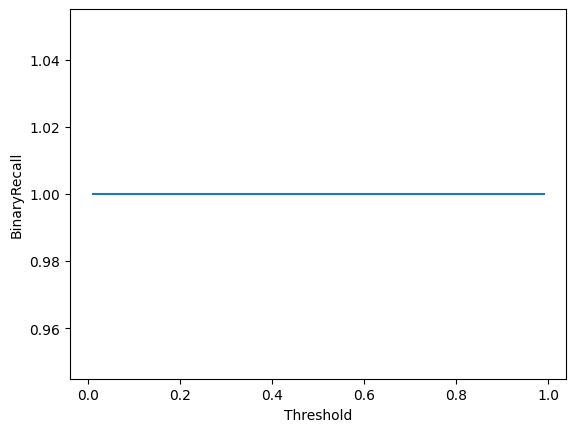

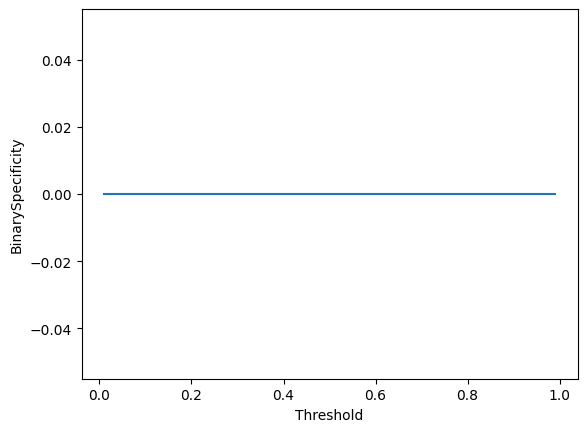


Model: densenet121 - Dataset: mri_data


Batch:   0%|          | 0/13 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.8401, device='cuda:0'), 'BinaryPrecision': tensor(0.9956, device='cuda:0'), 'BinaryRecall': tensor(0.7855, device='cuda:0'), 'BinaryF1Score': tensor(0.8781, device='cuda:0'), 'BinarySpecificity': tensor(0.9905, device='cuda:0'), 'BinaryAUROC': tensor(0.9739, device='cuda:0')}
tensor([[104,   1],
        [ 62, 227]], device='cuda:0')


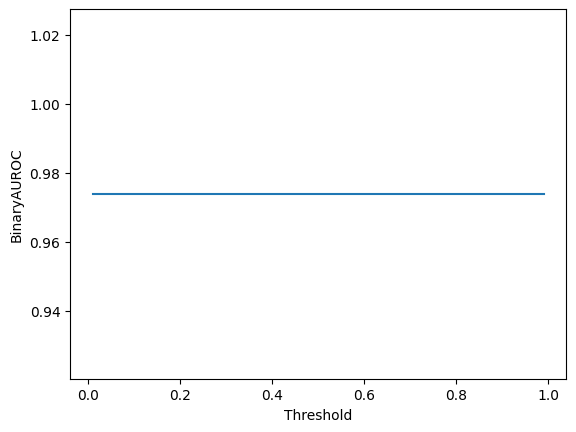

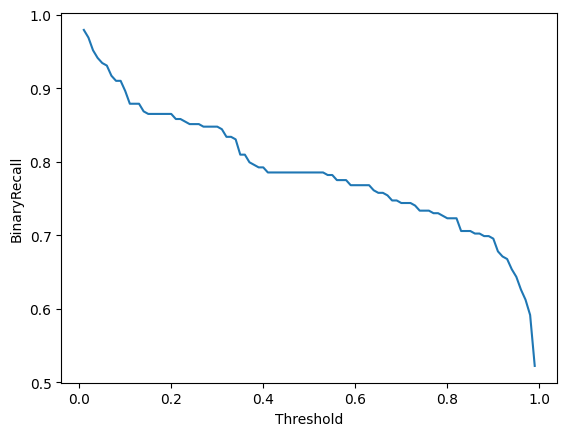

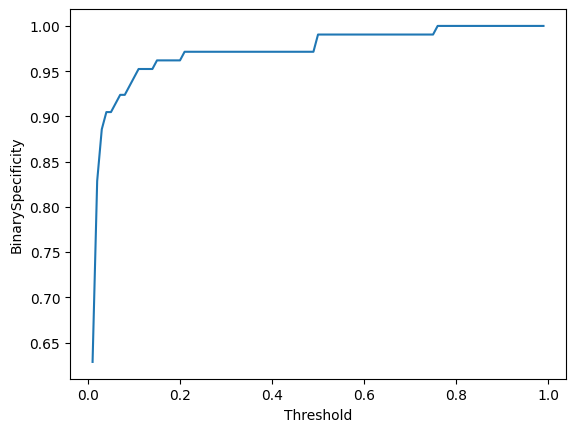


Model: densenet169 - Dataset: mri_data


Batch:   0%|          | 0/13 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.8629, device='cuda:0'), 'BinaryPrecision': tensor(0.9958, device='cuda:0'), 'BinaryRecall': tensor(0.8166, device='cuda:0'), 'BinaryF1Score': tensor(0.8973, device='cuda:0'), 'BinarySpecificity': tensor(0.9905, device='cuda:0'), 'BinaryAUROC': tensor(0.9365, device='cuda:0')}
tensor([[104,   1],
        [ 53, 236]], device='cuda:0')


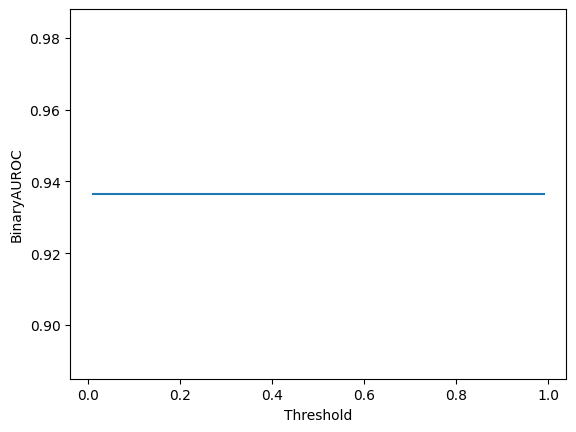

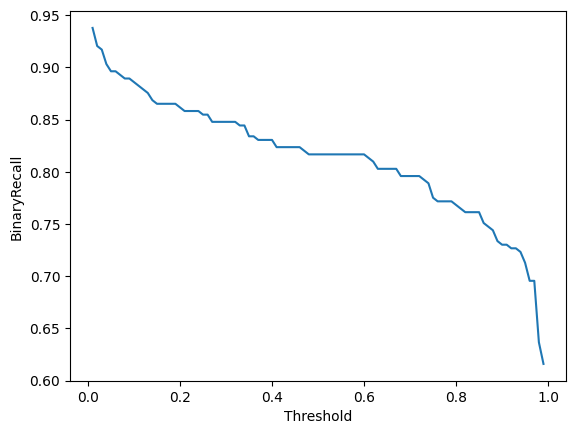

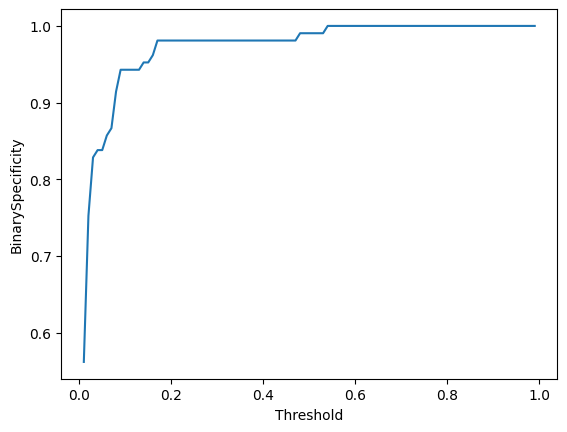


Model: efficientnet_v2_m - Dataset: mri_data


Batch:   0%|          | 0/13 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.8629, device='cuda:0'), 'BinaryPrecision': tensor(0.9719, device='cuda:0'), 'BinaryRecall': tensor(0.8374, device='cuda:0'), 'BinaryF1Score': tensor(0.8996, device='cuda:0'), 'BinarySpecificity': tensor(0.9333, device='cuda:0'), 'BinaryAUROC': tensor(0.9546, device='cuda:0')}
tensor([[ 98,   7],
        [ 47, 242]], device='cuda:0')


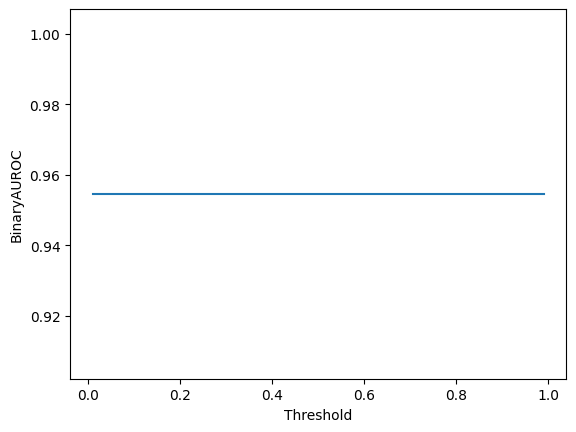

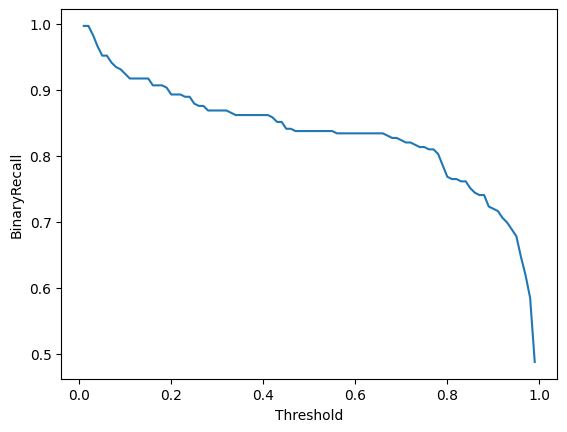

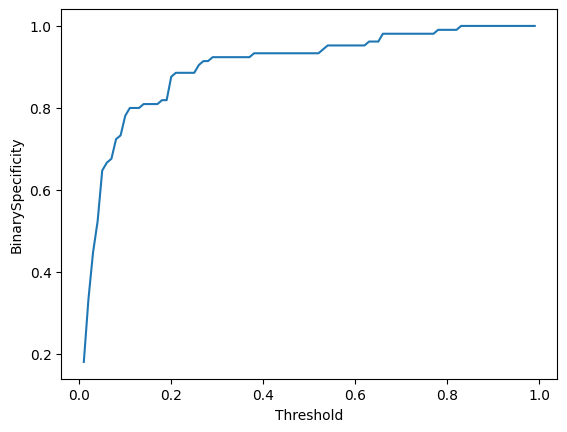


Model: efficientnet_v2_s - Dataset: mri_data


Batch:   0%|          | 0/13 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.7284, device='cuda:0'), 'BinaryPrecision': tensor(0.9550, device='cuda:0'), 'BinaryRecall': tensor(0.6609, device='cuda:0'), 'BinaryF1Score': tensor(0.7812, device='cuda:0'), 'BinarySpecificity': tensor(0.9143, device='cuda:0'), 'BinaryAUROC': tensor(0.8835, device='cuda:0')}
tensor([[ 96,   9],
        [ 98, 191]], device='cuda:0')


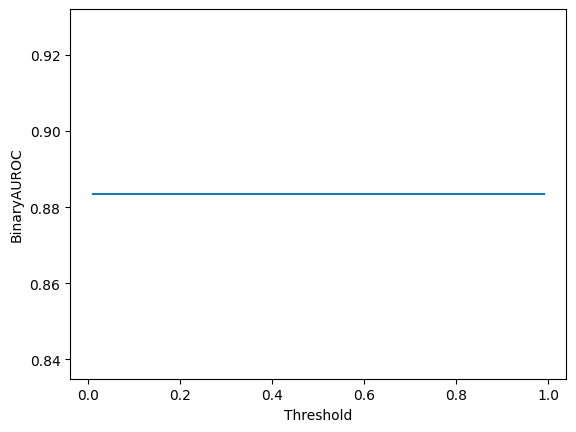

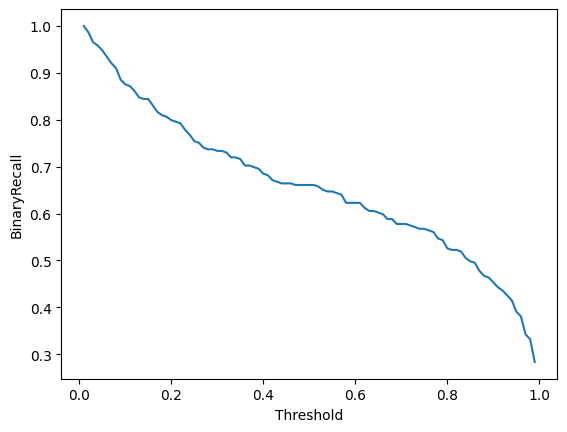

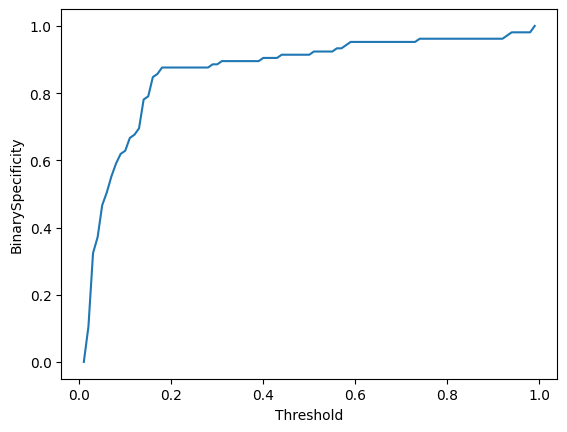


Model: resnet152 - Dataset: mri_data


Batch:   0%|          | 0/13 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.7817, device='cuda:0'), 'BinaryPrecision': tensor(0.9635, device='cuda:0'), 'BinaryRecall': tensor(0.7301, device='cuda:0'), 'BinaryF1Score': tensor(0.8307, device='cuda:0'), 'BinarySpecificity': tensor(0.9238, device='cuda:0'), 'BinaryAUROC': tensor(0.9105, device='cuda:0')}
tensor([[ 97,   8],
        [ 78, 211]], device='cuda:0')


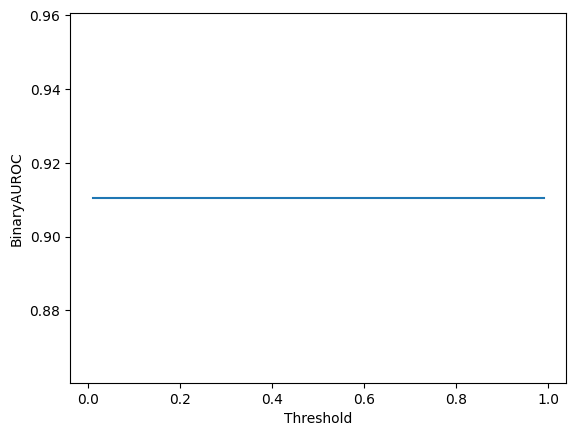

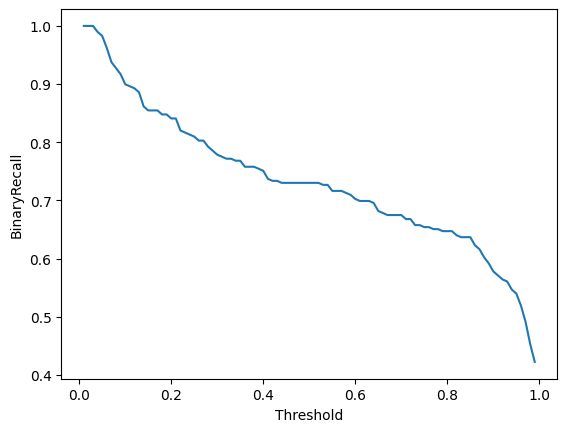

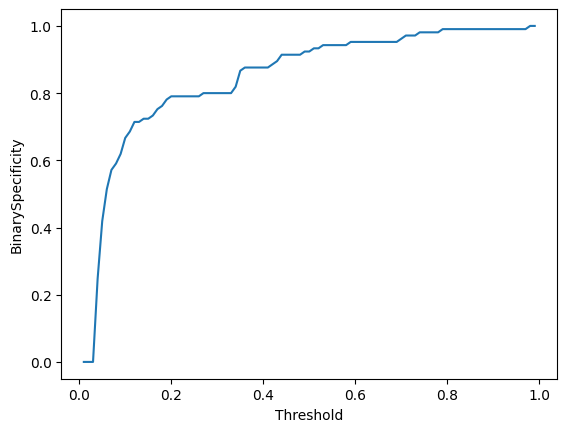


Model: resnet18 - Dataset: mri_data


Batch:   0%|          | 0/13 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.8680, device='cuda:0'), 'BinaryPrecision': tensor(0.9405, device='cuda:0'), 'BinaryRecall': tensor(0.8754, device='cuda:0'), 'BinaryF1Score': tensor(0.9068, device='cuda:0'), 'BinarySpecificity': tensor(0.8476, device='cuda:0'), 'BinaryAUROC': tensor(0.9224, device='cuda:0')}
tensor([[ 89,  16],
        [ 36, 253]], device='cuda:0')


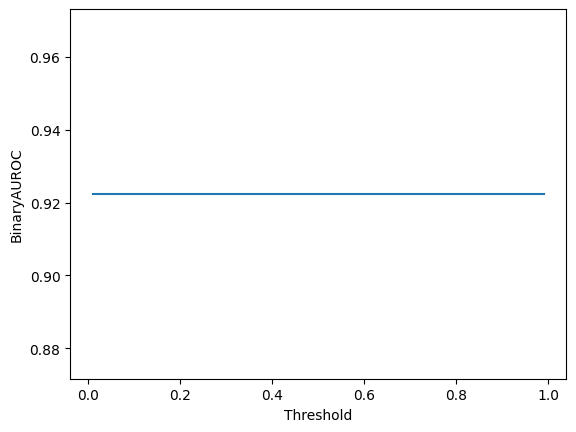

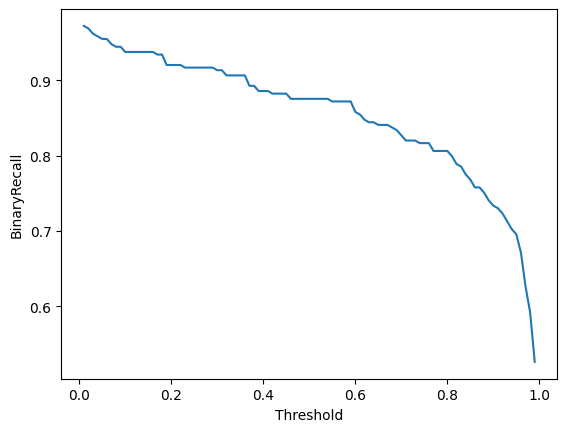

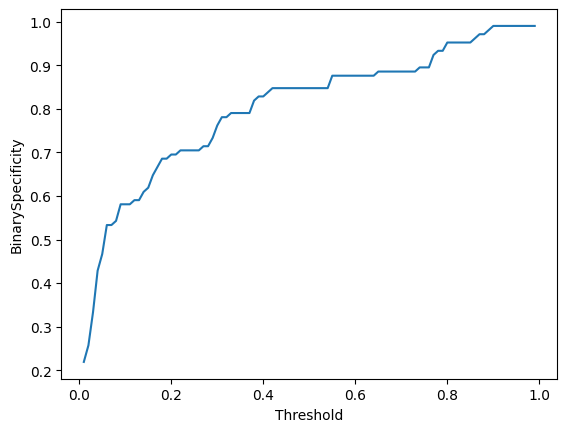


Model: resnet50 - Dataset: mri_data


Batch:   0%|          | 0/13 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.8325, device='cuda:0'), 'BinaryPrecision': tensor(0.9745, device='cuda:0'), 'BinaryRecall': tensor(0.7924, device='cuda:0'), 'BinaryF1Score': tensor(0.8740, device='cuda:0'), 'BinarySpecificity': tensor(0.9429, device='cuda:0'), 'BinaryAUROC': tensor(0.9475, device='cuda:0')}
tensor([[ 99,   6],
        [ 60, 229]], device='cuda:0')


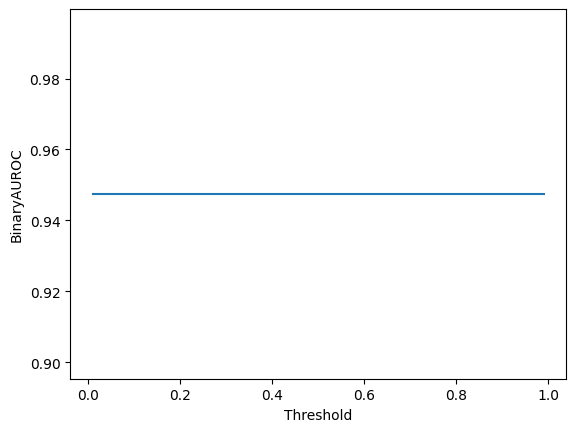

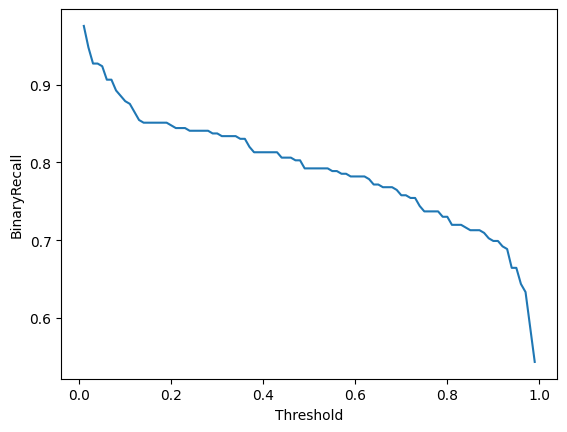

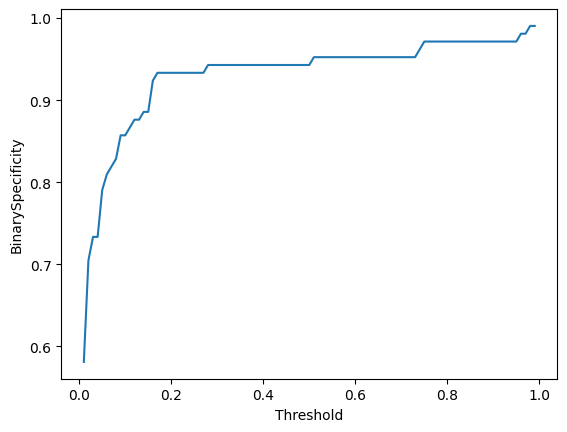


Model: vgg11 - Dataset: mri_data


Batch:   0%|          | 0/13 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.7335, device='cuda:0'), 'BinaryPrecision': tensor(0.7335, device='cuda:0'), 'BinaryRecall': tensor(1., device='cuda:0'), 'BinaryF1Score': tensor(0.8463, device='cuda:0'), 'BinarySpecificity': tensor(0., device='cuda:0'), 'BinaryAUROC': tensor(0.5000, device='cuda:0')}
tensor([[  0, 105],
        [  0, 289]], device='cuda:0')


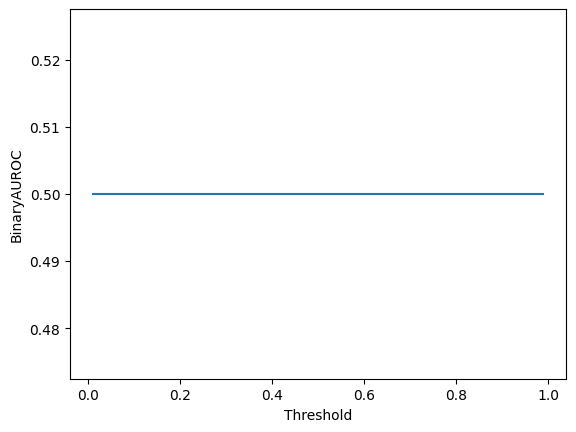

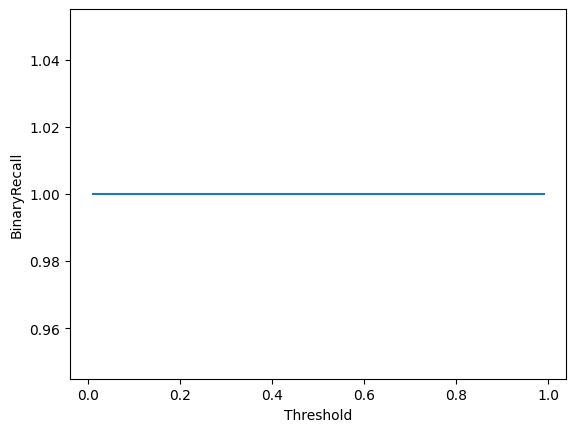

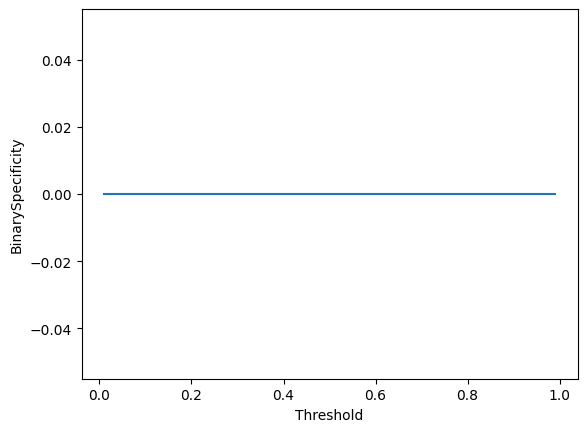


Model: vit_b_16 - Dataset: mri_data


Batch:   0%|          | 0/13 [00:00<?, ?it/s]

{'BinaryAccuracy': tensor(0.4467, device='cuda:0'), 'BinaryPrecision': tensor(0.8989, device='cuda:0'), 'BinaryRecall': tensor(0.2768, device='cuda:0'), 'BinaryF1Score': tensor(0.4233, device='cuda:0'), 'BinarySpecificity': tensor(0.9143, device='cuda:0'), 'BinaryAUROC': tensor(0.6605, device='cuda:0')}
tensor([[ 96,   9],
        [209,  80]], device='cuda:0')


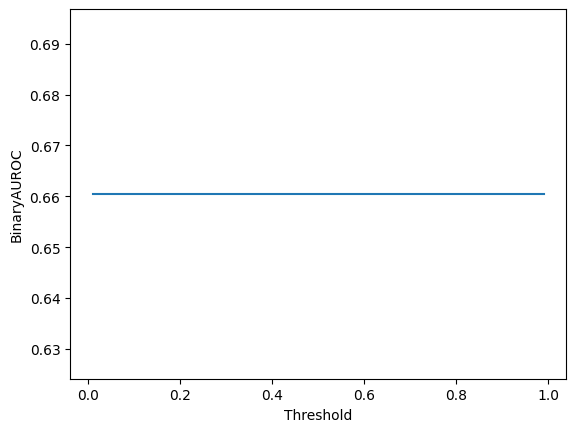

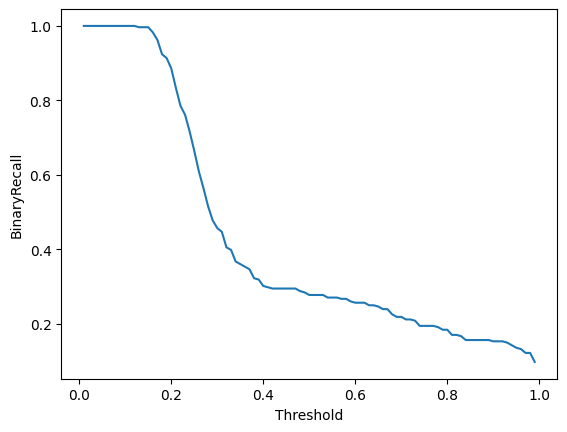

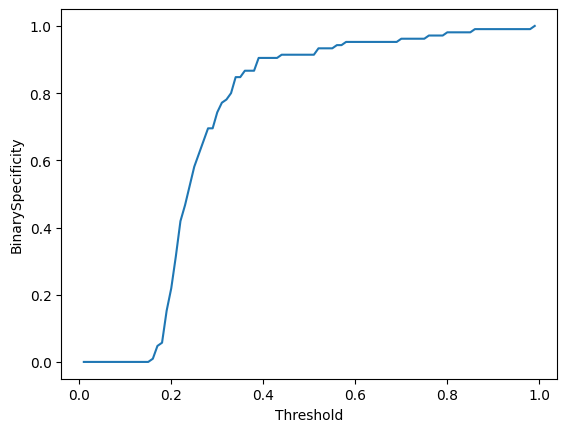

In [4]:
NUM_WORKERS = 8 

for idx, metadata in tqdm(best_models.iterrows(), desc="Model - Dataset Pair", position=0, total=len(best_models)):
    print(f"\nModel: {metadata.model} - Dataset: {metadata.dataset}")
    
    model_artifact = wandb.Api().artifact(f"{ENTITY}/{PROJECT}/model-{metadata.id}:best", type="model")
    model_path = model_artifact.file(root=f"models/{metadata.model}-{metadata.dataset}/")

    if metadata.dataset == "covidx_data":
        datamodule = COVIDXDataModule(
            path="data/raw/COVIDX-CXR4",
            transform=transform,
            num_workers=NUM_WORKERS,
            batch_size=metadata.batch_size,
            train_sample_size=0.05,
            train_shuffle=True,
        ).setup()
    elif metadata.dataset == "mri_data":
        datamodule = MRIDataModule(
            path="data/raw/Brain-Tumor-MRI",
            path_processed="data/processed/Brain-Tumor-MRI",
            transform=transform,
            num_workers=NUM_WORKERS,
            batch_size=metadata.batch_size,
            train_shuffle=True,
        ).setup()

    model = ImageClassifier.load_from_checkpoint(
        checkpoint_path=model_path,
        modelname=metadata.model,
        output_size=1,
        p_dropout_classifier=metadata.p_dropout_classifier,
        lr=metadata.lr,
        weight_decay=metadata.weight_decay,
    )

    model.freeze()
    model.eval()
    model.to(device)

    y_trues = []
    y_preds = []

    for batch in tqdm(datamodule.test_dataloader(), leave=False, desc="Batch", position=1):
        x, y = batch
        y_hat = model.predict(x.to(device))
        y_trues.append(y.to(device))
        y_preds.append(y_hat)

    y_trues = torch.cat(y_trues)
    y_preds = torch.cat(y_preds).squeeze(1)

    metrics_dict = metrics(y_preds, y_trues)
    print(metrics_dict)
    decisionmatrix = torchmetrics.ConfusionMatrix(task="Binary").to(device)(y_preds, y_trues)
    print(decisionmatrix)
    metrics_ = Metrics(y_preds = y_preds.cpu(), y_trues = y_trues.cpu())
    metrics_.visualize_threshold_metric_plot("BinaryAUROC")
    metrics_.visualize_threshold_metric_plot("BinaryRecall")
    metrics_.visualize_threshold_metric_plot("BinarySpecificity")